In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [ ]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(data=np.c_[iris["data"],iris["target"]],columns=iris["feature_names"]+["target"])

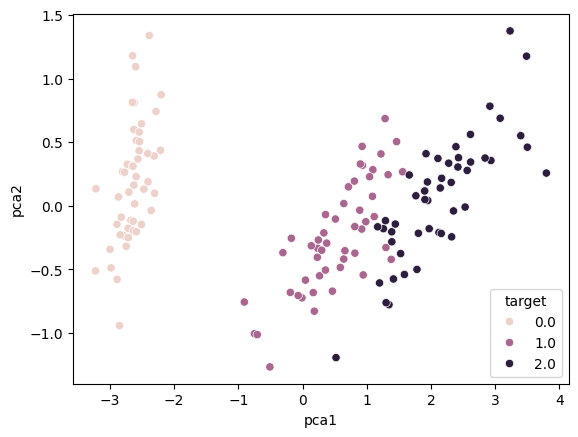

In [ ]:

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df.iloc[:, :-1])
iris_pca_df = pd.DataFrame(data=iris_pca, columns=["pca1","pca2"])
iris_pca_df["target"] = iris_df["target"]

sns.scatterplot(x="pca1",y="pca2",hue="target",data=iris_pca_df)
plt.show()

In [ ]:
x = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1:]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0, shuffle=True)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

normalizer = Normalizer()
normalized_x_train = normalizer.fit_transform(x_train)
normalized_x_test = normalizer.transform(x_test)

In [ ]:
def distance_ecu(X, X_train):
    distances = []

    for i in range(X_train.shape[0]):

        current_train_point = X_train[i]

        current_distance = 0

        for j in range(X_train.shape[1]):

            current_distance += (X[j] - current_train_point[j]) ** 2

        current_distance = np.sqrt(current_distance)

        distances.append((i,current_distance))

    distances_df = pd.DataFrame(data=distances, columns=['index','distance'])

    return distances_df

In [ ]:
def nearest_neighbors(distance_point, K):
    df_nearest = distance_point.sort_values(by='distance')
    df_nearest = df_nearest.iloc[:K]
    return df_nearest

In [ ]:
def voting(df_nearest, y_train):
    votes = []
    for i in range(df_nearest.shape[0]):
        votes.append(tuple(y_train[df_nearest.iloc[i,0]]))
    return Counter(votes).most_common(1)[0][0]

In [ ]:
def knn_custom(X_train, y_train, X_test, K):
    y_pred = []
    for i in range(X_test.shape[0]):
        distance = distance_ecu(X_test[i],X_train)
        nearest = nearest_neighbors(distance, K)
        y_pred.append(voting(nearest, y_train))
    return y_pred

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

y_pred_custom_3 = knn_custom(x_train, y_train, x_test, 3)
y_pred_custom_scaled_3 = knn_custom(scaled_x_train, y_train, scaled_x_test, 3)
y_pred_custom_normalized_3 = knn_custom(normalized_x_train, y_train, normalized_x_test, 3)
knn.fit(x_train, y_train.ravel())
y_pred_3 = knn.predict(x_test)
knn.fit(normalized_x_train, y_train.ravel())
y_pred_normalized_3 = knn.predict(normalized_x_test)
knn.fit(scaled_x_train, y_train.ravel())
y_pred_scaled_3 = knn.predict(scaled_x_test)


knn = KNeighborsClassifier(n_neighbors=5)

y_pred_custom_5 = knn_custom(x_train, y_train, x_test, 5)
y_pred_custom_scaled_5 = knn_custom(scaled_x_train, y_train, scaled_x_test, 5)
y_pred_custom_normalized_5 = knn_custom(normalized_x_train, y_train, normalized_x_test, 5)
knn.fit(x_train, y_train.ravel())
y_pred_5 = knn.predict(x_test)
knn.fit(normalized_x_train, y_train.ravel())
y_pred_normalized_5 = knn.predict(normalized_x_test)
knn.fit(scaled_x_train, y_train.ravel())
y_pred_scaled_5 = knn.predict(scaled_x_test)


knn = KNeighborsClassifier(n_neighbors=7)

y_pred_custom_7 = knn_custom(x_train, y_train, x_test, 7)
y_pred_custom_scaled_7 = knn_custom(scaled_x_train, y_train, scaled_x_test, 7)
y_pred_custom_normalized_7 = knn_custom(normalized_x_train, y_train, normalized_x_test, 7)
knn.fit(x_train, y_train.ravel())
y_pred_7 = knn.predict(x_test)
knn.fit(normalized_x_train, y_train.ravel())
y_pred_normalized_7 = knn.predict(normalized_x_test)
knn.fit(scaled_x_train, y_train.ravel())
y_pred_scaled_7 = knn.predict(scaled_x_test)


In [ ]:
print("Accuracy of KNN with K=3",accuracy_score(y_test, y_pred_3)*100,"%")
print("Accuracy of KNN with K=3 (Scaled)",accuracy_score(y_test, y_pred_scaled_3)*100,"%")
print("Accuracy of KNN with K=3 (Normalized)",accuracy_score(y_test, y_pred_normalized_3)*100,"%")
print("Accuracy of KNN with K=3 (Custom)",accuracy_score(y_test, y_pred_custom_3)*100,"%")
print("Accuracy of KNN with K=3 (Custom Scaled)",accuracy_score(y_test, y_pred_custom_scaled_3)*100,"%")
print("Accuracy of KNN with K=3 (Custom Normalized)",accuracy_score(y_test, y_pred_custom_normalized_3)*100,"%")
print("Accuracy of KNN with K=5",accuracy_score(y_test, y_pred_5)*100,"%")
print("Accuracy of KNN with K=5 (Scaled)",accuracy_score(y_test, y_pred_scaled_5)*100,"%")
print("Accuracy of KNN with K=5 (Normalized)",accuracy_score(y_test, y_pred_normalized_5)*100,"%")
print("Accuracy of KNN with K=5 (Custom)",accuracy_score(y_test, y_pred_custom_5)*100,"%")
print("Accuracy of KNN with K=5 (Custom Scaled)",accuracy_score(y_test, y_pred_custom_scaled_5)*100,"%")
print("Accuracy of KNN with K=5 (Custom Normalized)",accuracy_score(y_test, y_pred_custom_normalized_5)*100,"%")
print("Accuracy of KNN with K=7",accuracy_score(y_test, y_pred_7)*100,"%")
print("Accuracy of KNN with K=7 (Scaled)",accuracy_score(y_test, y_pred_scaled_7)*100,"%")
print("Accuracy of KNN with K=7 (Normalized)",accuracy_score(y_test, y_pred_normalized_7)*100,"%")
print("Accuracy of KNN with K=7 (Custom)",accuracy_score(y_test, y_pred_custom_7)*100,"%")
print("Accuracy of KNN with K=7 (Custom Scaled)",accuracy_score(y_test, y_pred_custom_scaled_7)*100,"%")
print("Accuracy of KNN with K=7 (Custom Normalized)",accuracy_score(y_test, y_pred_custom_normalized_7)*100,"%")



Accuracy of KNN with K=3 96.66666666666667 %
Accuracy of KNN with K=3 (Scaled) 96.66666666666667 %
Accuracy of KNN with K=3 (Normalized) 96.66666666666667 %
Accuracy of KNN with K=3 (Custom) 96.66666666666667 %
Accuracy of KNN with K=3 (Custom Scaled) 96.66666666666667 %
Accuracy of KNN with K=3 (Custom Normalized) 96.66666666666667 %
Accuracy of KNN with K=5 96.66666666666667 %
Accuracy of KNN with K=5 (Scaled) 100.0 %
Accuracy of KNN with K=5 (Normalized) 100.0 %
Accuracy of KNN with K=5 (Custom) 96.66666666666667 %
Accuracy of KNN with K=5 (Custom Scaled) 100.0 %
Accuracy of KNN with K=5 (Custom Normalized) 100.0 %
Accuracy of KNN with K=7 100.0 %
Accuracy of KNN with K=7 (Scaled) 100.0 %
Accuracy of KNN with K=7 (Normalized) 96.66666666666667 %
Accuracy of KNN with K=7 (Custom) 100.0 %
Accuracy of KNN with K=7 (Custom Scaled) 100.0 %
Accuracy of KNN with K=7 (Custom Normalized) 96.66666666666667 %
